# Technika regulacji - Projekt 2

**Autorzy:** Iwo Chwiszczuk 280043, Szymon Flis 280153

üìÖ **Data:** 27 kwietnia 2025 

## Przygotowanie potrzebnych bibliotek i narzƒôdzi oraz wyliczenie sta≈Çych A, B i C

In [103]:
import sympy as sp
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from scipy.optimize import curve_fit, minimize
from scipy.integrate import trapezoid
import itertools
sp.init_printing()

t, s, K_p, K_i = sp.symbols('t, s, K_p, K_i')


A, B = 3, 3
C = A + B

## Zadanie 1

### Dany jest obiekt inercyjny o transmitancji:
$$
G_1(s)=\frac{A}{Bs+1} \quad dla \quad A=B=3
$$

In [104]:
g = ctrl.TransferFunction([A], [B, 1])

### Charakterystyka amplitudowo-fazowa (Nyquista) wygenerowana dla transmitancji $G_1(s)$ automatycznie funkcjƒÖ "nyquist_plot":

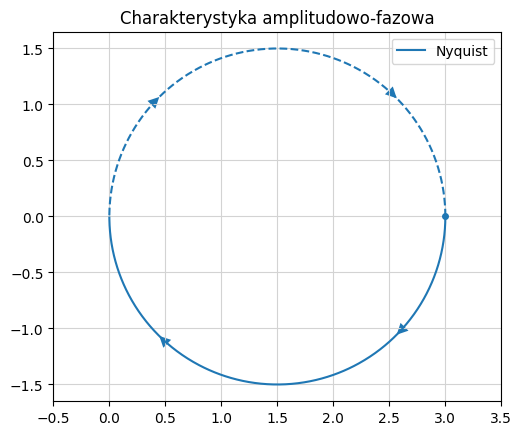

In [105]:
fig, ax = plt.subplots()

ctrl.nyquist_plot(g, ax=ax, label='Nyquist')

ax.set_title('Charakterystyka amplitudowo-fazowa')
ax.set_aspect('equal')
ax.set_xlim(-0.5, 3.5)
ax.legend()
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

### Wyznaczanie charakterystyki amplitudowo-fazowej "rƒôcznie" poprzez przepuszczenie sygna≈Çu $u(t)=sin(\omega _0 t)$ przez obiekt o transmitancji $G_1(s)$:

Wyj≈õcie $y(t)$ obiektu jest aproksymowane funkcjƒÖ $Asin(\omega _0 t + \phi)$ aby uzyskaƒá warto≈õci amplitudy i przesuniƒôcia fazowego ($A, \phi$). Po przepuszczeniu $u(t)$ przez obiekt, $y(t)$ stablilizuje siƒô dopiero po kilku okresach sygna≈Çu, dlatego przed aproksymacjƒÖ poczƒÖtkowa czƒô≈õƒá sygna≈Çu jest odcinana.

A: 0.33058875341011185, phi: -1.4590617000692612


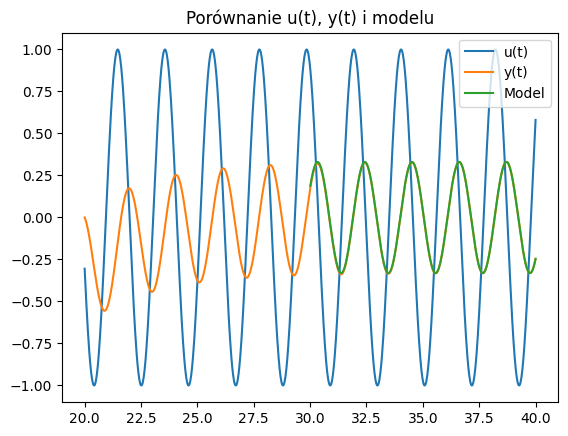

In [106]:
omega_0 = 3

t_in = np.linspace(20, 40, 1000)
u_in = np.sin(omega_0 * t_in)
t_out, y_out = ctrl.forced_response(g, T=t_in, U=u_in)

t_stablized = t_out[int(0.5*len(t_in)):]
y_stablized = y_out[int(0.5*len(t_in)):]

def sin_model(t, A, phi):
    return A * np.sin(omega_0 * t + phi)

params, _ = curve_fit(sin_model, t_stablized, y_stablized, p0=[1, 0])
A, phi = params
print(f"A: {A}, phi: {phi}")
y_model = sin_model(t_stablized, A, phi)

fig2, ax2 = plt.subplots()
ax2.set_title('Por√≥wnanie u(t), y(t) i modelu')
ax2.plot(t_in, u_in, label="u(t)")
ax2.plot(t_out, y_out, label="y(t)")
ax2.plot(t_stablized, y_model, label="Model")
ax2.legend()
plt.show()

Symulacja taka zosta≈Ça powt√≥rzona dla r√≥≈ºnych $\omega _0$, a warto≈õci $A$ i $\phi$ naszkicowane zosta≈Çy na wykresie o wsp√≥≈Çrzƒôdnych biegunowych. Otrzymano w ten spos√≥b charakterystykƒô amplitudowo-fazowƒÖ wyznaczonƒÖ "rƒôcznie" (faktycznie otrzymano jedynie dolnƒÖ po≈Çowƒô wykresu - g√≥rna jest odbiciem dolnej wzglƒôdem osi X). Na ten sam wykres naniesiono r√≥wnie≈º charakterystykƒô otrzymanƒÖ funkcjƒÖ "nyquist_plot".

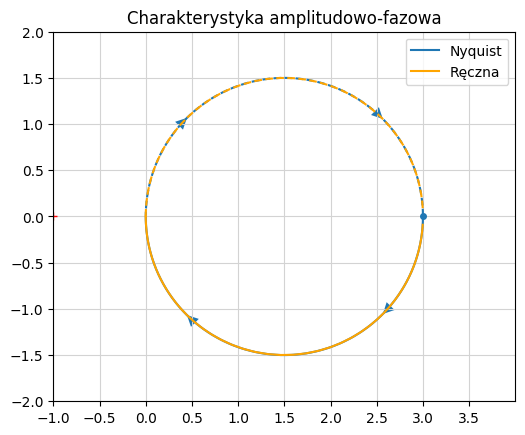

In [118]:
fig3, ax3 = plt.subplots()
ax3.set_title('Charakterystyka amplitudowo-fazowa')
x_points = []
y_points = []

t_in = np.linspace(0, 150, 4000)

for omega in np.logspace(-2, 2, 100):
    u_in = np.sin(omega * t_in)
    t_out, y_out = ctrl.forced_response(g, T=t_in, U=u_in)
    (A, phi), _ = curve_fit(lambda t,A,phi : A*np.sin(omega*t+phi), t_out[int(0.5*len(t_in)):], y_out[int(0.5*len(t_in)):], p0=[1, 0])
    x_points.append(A*np.cos(phi))
    y_points.append(A*np.sin(phi))

x_points, y_points = np.array(x_points), np.array(y_points)

ctrl.nyquist_plot(g, ax=ax3, label='Nyquist')
ax3.plot(x_points, y_points, color='orange', label='Rƒôczna')
ax3.plot(x_points, -y_points, linestyle='--', color='orange')
ax3.set_xlim(-1, 4)
ax3.set_xticks(np.arange(-1, 4, 0.5))
ax3.set_ylim(-2, 2)
ax3.set_aspect('equal')
ax3.legend(loc='upper right')
ax3.set_xlabel('')
ax3.set_ylabel('')
plt.show()


### Interpretacja wynik√≥w:
- Charakterystyka tego uk≈Çadu ma postaƒá okrƒôgu o promieniu 1.5 i ≈õrodku w punkcie (1.5, 0). Zgadza siƒô to z teoriƒÖ dla uk≈Çadu pierwszego rzƒôdu.
- Brak obecno≈õci charakterystyki w punkcie (-1, 0) oznacza ≈ºe uk≈Çad jest stabliny.
- Charakterystyki otrzymane "rƒôcznie" i automatycznie wygenerowy wykres Nyquista pokrywajƒÖ siƒô. Przy za≈Ço≈ºeniu poprawno≈õci automatycznej generacji charakterysytyki oznacza to poprawno≈õƒá podej≈õcia "rƒôcznego".


## Zadanie 2

In [108]:
G2_s = C/((s+2)*(s+3)*(s-1))
display(Markdown(f"$$G_2(s) = {sp.latex(G2_s)}$$"))

$$G_2(s) = \frac{6}{\left(s - 1\right) \left(s + 2\right) \left(s + 3\right)}$$

### Wyznaczanie teorytycznego zakresu stabilno≈õci uk≈Çadu regulacji z regulatorem P oraz PI

#### Regulator P
Funkcja wyznaczajƒÖca zakres stabilno≈õci uk≈Çadu regulacji z regulatorem P

In [109]:
def hurwitz_matrix(poly_coeffs):
    n = len(poly_coeffs) - 1
    H = sp.zeros(n, n)

    for col in range(n):
        row = 2*col + 1
        coeff_index = 0
        while(coeff_index <= n and row >= 0):
            if(row < n):
                H[row, col] = poly_coeffs[coeff_index]
            coeff_index += 1
            row -= 1
    return H

def check_stability_P(G_s, K_p):
    char_eq = sp.Eq(1 + K_p * G_s, 0).simplify()
    char_poly = sp.fraction(char_eq.lhs)[0].expand()

    coeffs = sp.Poly(char_poly, s).all_coeffs()
    H = hurwitz_matrix(coeffs)

    conditions = [sp.simplify(coeff > 0) for coeff in coeffs]
    for i in range(1, H.rows + 1):
        minor = H[:i, :i].det()
        conditions.append(sp.simplify(minor > 0))
    
    return sp.solve(conditions, K_p, domain=sp.Reals), char_poly, H


sol_P_G2_s = check_stability_P(G2_s, K_p)
display(Markdown(f"**Wielomian charakterystyczny uk≈Çadu:** ${sp.latex(sol_P_G2_s[1])}$"))
display(Markdown(f"**Macierz Hurwitza:** ${sp.latex(sol_P_G2_s[2])}$"))
display(Markdown(f"**Zakres stabilno≈õci uk≈Çadu:** ${sp.latex(sol_P_G2_s[0])}$"))

**Wielomian charakterystyczny uk≈Çadu:** $6 K_{p} + s^{3} + 4 s^{2} + s - 6$

**Macierz Hurwitza:** $\left[\begin{matrix}4 & 6 K_{p} - 6 & 0\\1 & 1 & 0\\0 & 4 & 6 K_{p} - 6\end{matrix}\right]$

**Zakres stabilno≈õci uk≈Çadu:** $1 < K_{p} \wedge K_{p} < \frac{5}{3}$

#### Regulator PI
Funkcja wyznaczajƒÖca warunki stabilno≈õci uk≈Çadu regulacji z regulatorem PI

In [110]:
def check_stability_PI(G_s, K_p, K_i):
    char_eq = sp.Eq(1 + (K_p + K_i / s) * G_s, 0).simplify()
    char_poly = sp.fraction(char_eq.lhs)[0].expand()
    
    coeffs = sp.Poly(char_poly, s).all_coeffs()
    H = hurwitz_matrix(coeffs)

    conditions = [sp.simplify(coeff > 0) for coeff in coeffs]
    for i in range(1, H.rows + 1):
        minor = H[:i, :i].det()
        conditions.append(sp.simplify(minor > 0))

    return conditions, char_poly, H


sol_PI_G2_s = check_stability_PI(G2_s, K_p, K_i)
display(Markdown(f"**Wielomian charakterystyczny uk≈Çadu:** ${sp.latex(sol_PI_G2_s[1])}$"))
display(Markdown(f"**Macierz Hurwitza:** ${sp.latex(sol_PI_G2_s[2])}$"))

i = 1
display(Markdown("**Warunki stabilno≈õci:**"))
conditions = [cond for cond in sol_PI_G2_s[0] if(cond != True)]
for cond in conditions:
    display(Markdown(f"**Warunek {i}:** ${sp.latex(cond)}$"))
    i += 1

**Wielomian charakterystyczny uk≈Çadu:** $6 K_{i} + 6 K_{p} s + s^{4} + 4 s^{3} + s^{2} - 6 s$

**Macierz Hurwitza:** $\left[\begin{matrix}4 & 6 K_{p} - 6 & 0 & 0\\1 & 1 & 6 K_{i} & 0\\0 & 4 & 6 K_{p} - 6 & 0\\0 & 1 & 1 & 6 K_{i}\end{matrix}\right]$

**Warunki stabilno≈õci:**

**Warunek 1:** $K_{p} > 1$

**Warunek 2:** $K_{i} > 0$

**Warunek 3:** $K_{p} < \frac{5}{3}$

**Warunek 4:** $96 K_{i} + 36 K_{p}^{2} - 96 K_{p} + 60 < 0$

**Warunek 5:** $72 K_{i} \left(- 8 K_{i} - 3 K_{p}^{2} + 8 K_{p} - 5\right) > 0$

##### Analityczne wyznaczenie zakresu stabilno≈õci uk≈Çadu
Z Warunku 4.:
$$K_i < -\frac{3}{8}{K_{p}}^2 + K_p - \frac{5}{8}$$

Z Warunku 5.:
- z Warunku 2. wiemy, ≈ºe:
$$K_i > 0$$
- wiƒôc:
$$-8K_i - 3{K_{p}}^2 + 8K_p - 5 > 0 \implies K_i < -\frac{3}{8}{K_{p}}^2 + K_p - \frac{5}{8}$$

PodsumowujƒÖc:
$$1 < K_p < \frac{5}{3}$$
$$0 < K_i < -\frac{3}{8}{K_{p}}^2 + K_p - \frac{5}{8}$$

##### Obszar stabilno≈õci

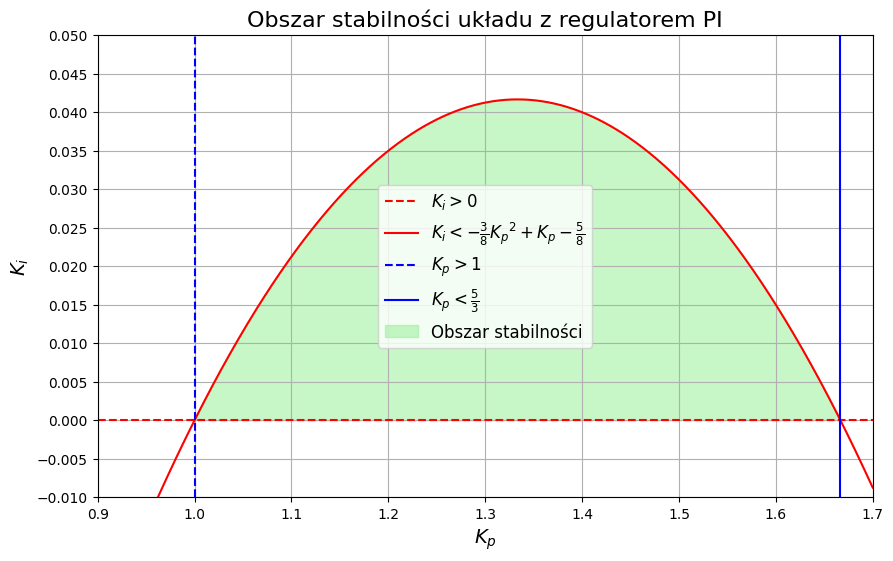

In [111]:
K_p_values = np.linspace(0.9, 1.7, 1000)
K_i_values = np.linspace(-0.01, 0.05, 1000)

plt.figure(figsize=(10, 6))
plt.axhline(0, color='r', linestyle='--', label=r'$K_i > 0$')
plt.plot(K_p_values, -3/8*K_p_values**2 + K_p_values - 5/8, 'r', label=r'$K_i < -\frac{3}{8}{K_p}^2 + K_p - \frac{5}{8}$')

plt.axvline(1, color='b', linestyle='--', label=r'$K_p > 1$')
plt.axvline(5/3, color='b', label=r'$K_p < \frac{5}{3}$')

plt.fill_between(K_p_values[(K_p_values > 1) & (K_p_values < 5/3)], 0, -3/8*K_p_values[(K_p_values > 1) & (K_p_values < 5/3)]**2 + K_p_values[(K_p_values > 1) & (K_p_values < 5/3)] - 5/8, 
                color='lightgreen', alpha=0.5, label='Obszar stabilno≈õci')

plt.xticks(np.arange(0.8, 1.8, step=0.1))
plt.yticks(np.arange(-0.01, 0.055, step=0.005))
plt.xlabel(r'$K_p$', fontsize=14)
plt.ylabel(r'$K_i$', fontsize=14)
plt.title('Obszar stabilno≈õci uk≈Çadu z regulatorem PI', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0.9, 1.7)
plt.ylim(-0.01, 0.05)
plt.show()

### Symulacja r√≥≈ºnych konfiguracji parametr√≥w regulatora

#### Regulator P

$K_p \not\in (1, \frac53) \implies$ **uk≈Çad niestabilny**

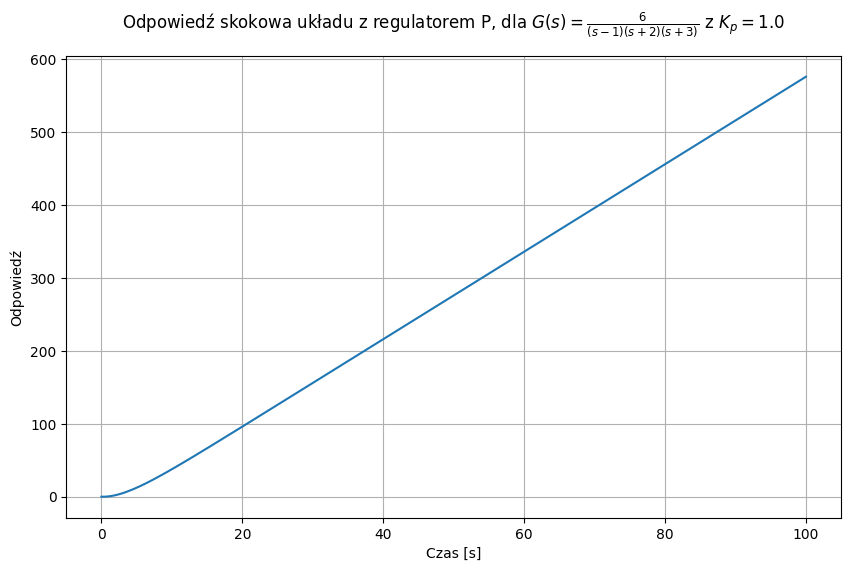

$K_p \not\in (1, \frac53) \implies$ **uk≈Çad niestabilny**

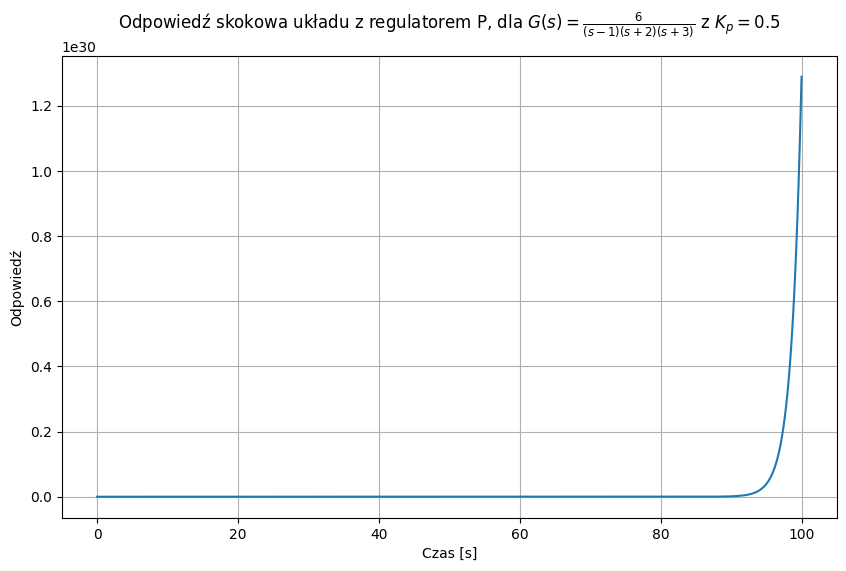

$K_p \in (1, \frac53) \implies$ **uk≈Çad stabilny**

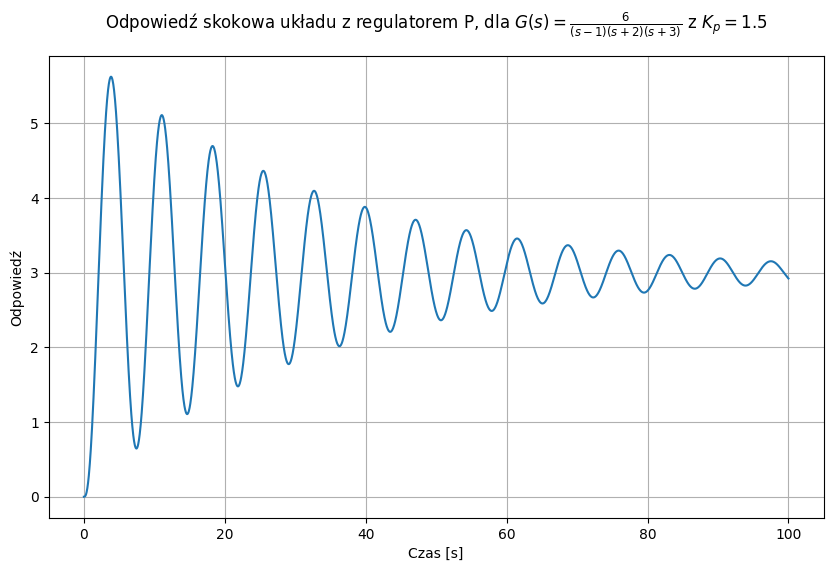

$K_p \not\in (1, \frac53) \implies$ **uk≈Çad niestabilny**

In [112]:
def P_regulator_step_resp(G, K_p):
    L_s, M_s = sp.fraction(G)
    num_coeffs = [float(c) for c in sp.Poly(L_s, s).all_coeffs()]
    den_coeffs = [float(c) for c in sp.Poly(M_s, s).all_coeffs()]
    G_tf = ctrl.TransferFunction(num_coeffs, den_coeffs)

    plt.figure(figsize=(10, 6))

    # Transmitancja regulatora P - K_p
    C = ctrl.TransferFunction([K_p], [1])
    
    # Ujemne sprzƒô≈ºenie zwrotne
    T = ctrl.feedback(C * G_tf, 1)
    
    # Odpowied≈∫ skokowa uk≈Çadu
    t, y = ctrl.step_response(T, T=100)
    
    plt.plot(t, y)

    plt.title(fr'Odpowied≈∫ skokowa uk≈Çadu z regulatorem P, dla $G(s) = {sp.latex(G)}$ z $K_p = {K_p}$', pad=20)
    plt.xlabel('Czas [s]')
    plt.ylabel('Odpowied≈∫')
    plt.grid(True)
    plt.show()


display(Markdown(fr'$K_p \not\in (1, \frac{5}{3}) \implies$ **uk≈Çad niestabilny**'))
P_regulator_step_resp(G2_s, 1.0)

display(Markdown(fr'$K_p \not\in (1, \frac{5}{3}) \implies$ **uk≈Çad niestabilny**'))
P_regulator_step_resp(G2_s, 0.5)

display(Markdown(fr'$K_p \in (1, \frac{5}{3}) \implies$ **uk≈Çad stabilny**'))
P_regulator_step_resp(G2_s, 1.5)

display(Markdown(fr'$K_p \not\in (1, \frac{5}{3}) \implies$ **uk≈Çad niestabilny**'))
P_regulator_step_resp(G2_s, 2.5)

#### Regulator PI

$K_p \not\in (1, \frac53)$, $K_i \not\in (0, -\frac38K_p^2 + K_p - \frac58) \implies$ **uk≈Çad niestabilny**

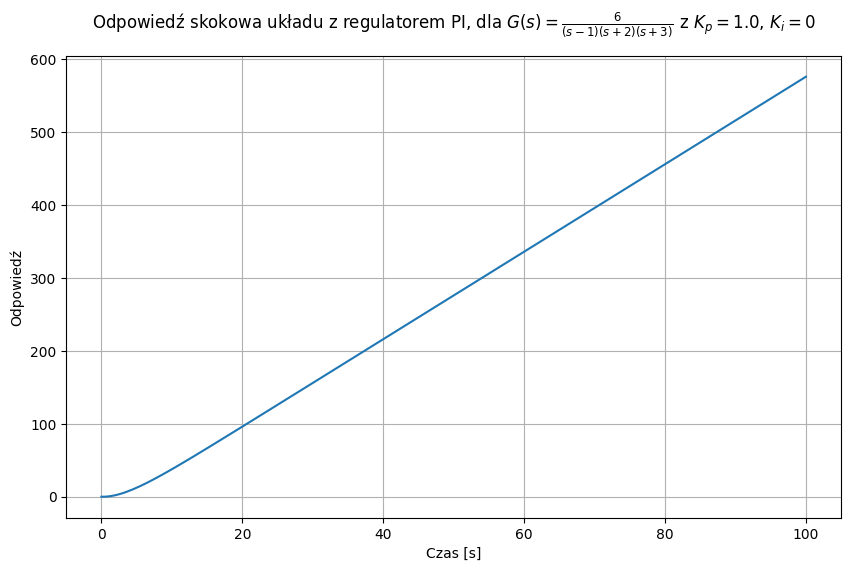

$K_p \not\in (1, \frac53)$, $K_i \not\in (0, -\frac38K_p^2 + K_p - \frac58) \implies$ **uk≈Çad niestabilny**

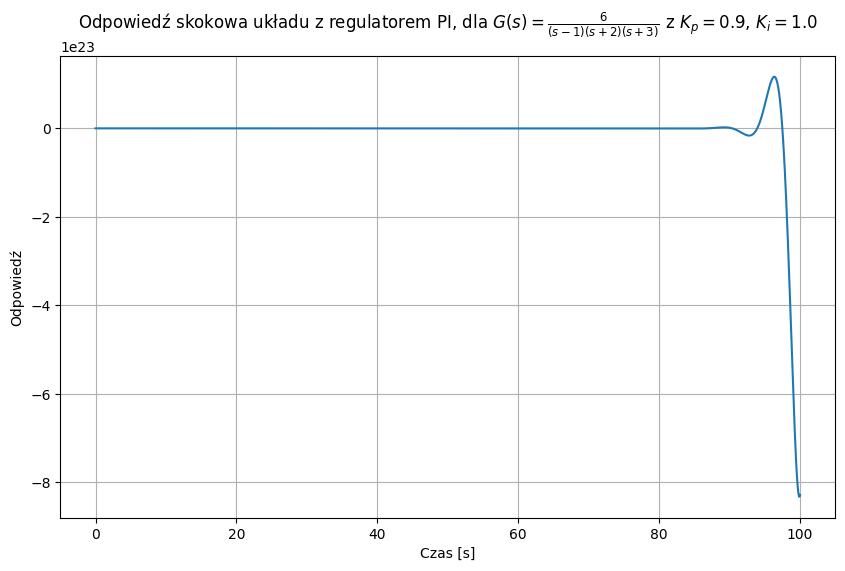

$K_p \in (1, \frac53)$, $K_i \not\in (0, -\frac38K_p^2 + K_p - \frac58) \implies$ **uk≈Çad niestabilny**

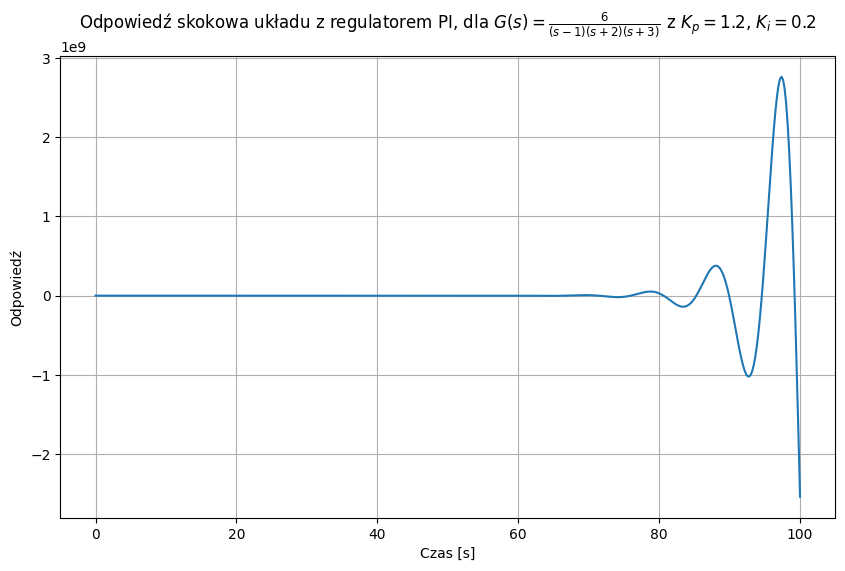

$K_p \in (1, \frac53)$, $K_i \in (0, -\frac38K_p^2 + K_p - \frac58) \implies$ **uk≈Çad stabilny**

In [113]:
def PI_regulator_step_resp(G, K_p, K_i):
    L_s, M_s = sp.fraction(G)
    num_coeffs = [float(c) for c in sp.Poly(L_s, s).all_coeffs()]
    den_coeffs = [float(c) for c in sp.Poly(M_s, s).all_coeffs()]
    G_tf = ctrl.TransferFunction(num_coeffs, den_coeffs)
    
    plt.figure(figsize=(10, 6))

    # Transmitancja regulatora PI - (K_p * s + K_i)/s
    C = ctrl.TransferFunction([K_p, K_i], [1, 0])
    
    # Ujemne sprzƒô≈ºenie zwrotne
    T = ctrl.feedback(C * G_tf, 1)
    
    # Odpowied≈∫ skokowa uk≈Çadu
    t, y = ctrl.step_response(T, T=100)
    
    plt.plot(t, y)

    plt.title(fr'Odpowied≈∫ skokowa uk≈Çadu z regulatorem PI, dla $G(s) = {sp.latex(G)}$ z $K_p = {K_p}$, $K_i = {K_i}$', pad=20)
    plt.xlabel('Czas [s]')
    plt.ylabel('Odpowied≈∫')
    plt.grid(True)
    plt.show()


display(Markdown(fr'$K_p \not\in (1, \frac{5}{3})$, $K_i \not\in (0, -\frac{3}{8}K_p^2 + K_p - \frac{5}{8}) \implies$ **uk≈Çad niestabilny**'))
PI_regulator_step_resp(G2_s, 1.0, 0)

display(Markdown(fr'$K_p \not\in (1, \frac{5}{3})$, $K_i \not\in (0, -\frac{3}{8}K_p^2 + K_p - \frac{5}{8}) \implies$ **uk≈Çad niestabilny**'))
PI_regulator_step_resp(G2_s, 0.9, 1.0)

display(Markdown(fr'$K_p \in (1, \frac{5}{3})$, $K_i \not\in (0, -\frac{3}{8}K_p^2 + K_p - \frac{5}{8}) \implies$ **uk≈Çad niestabilny**'))
PI_regulator_step_resp(G2_s, 1.2, 0.2)

display(Markdown(fr'$K_p \in (1, \frac{5}{3})$, $K_i \in (0, -\frac{3}{8}K_p^2 + K_p - \frac{5}{8}) \implies$ **uk≈Çad stabilny**'))
PI_regulator_step_resp(G2_s, 1.5, 0.025)

### Interpretacja wynik√≥w
Wyniki symulacji sƒÖ zgodne z analizƒÖ stabilno≈õci przeprowadzonƒÖ za pomocƒÖ kryterium Hurwitza:
- Dla warto≈õci parametr√≥w regulatora ($K_p$ dla regulatora P i $K_p$, $K_i$ dla regulatora PI) nale≈ºƒÖcych do wyznaczonego obszaru stabilno≈õci, uk≈Çad wykazywa≈Ç stabilnƒÖ odpowied≈∫ na skok jednostkowy, sygna≈Ç wyj≈õciowy asymptotycznie dƒÖ≈ºy≈Ç do warto≈õci ustalonej z oscylacjami t≈Çumionymi
- Dla warto≈õci parametr√≥w spoza wyznaczonego zakresu obserwowano rozbie≈ºno≈õƒá odpowiedzi, uk≈Çad nie osiƒÖga≈Ç warto≈õci ustalonej, oscylacje ros≈Çy
- Dla warto≈õci parametr√≥w le≈ºƒÖcych na granicy obszaru stabilno≈õci odpowied≈∫ uk≈Çadu oscylowa≈Ça liniowo, co potwierdza krytyczne warunki stabilno≈õci (ostre nier√≥wno≈õci w kryterium Hurwitza)

## Zadanie 3

### Zbudowanie uk≈Çadu i wyznaczenie optymalnych nastaw regulatora
![Rysunek 1: Schemat sterowania do zadania nr 3](projekt2_rysunek1.png)

In [114]:
time = np.linspace(0, 100, 10000)
r = np.zeros_like(time)
r[time >= 1] = 10

#### Metoda pierwsza - rƒôczna
Funkcja poni≈ºej s≈Çu≈ºy do wyznaczenia takich $K_p$ i $K_i$, dla kt√≥rych IAE jest najmniejsze. Zawiera w sobie dwie podfunkcje:
- IAE - funkcja wyliczajƒÖca IAE dla zadanych nastaw
- K_val_gen - funkcja generujƒÖca kolejne pary warto≈õci $K_p$ i $K_i$ z zadanego przedzia≈Çu. W tym wypadku ten przedzia≈Ç to zakres stabilno≈õci uk≈Çadu regulacji (obliczony w zadaniu 2.)

In [115]:
def manual_find_best_setpoints(t, r_t, G, K_p_bot, K_p_top, K_i_bot, K_i_top):    
    def IAE(params):
        K_p, K_i = params
        L_s, M_s = sp.fraction(G)
        num_coeffs = [float(c) for c in sp.Poly(L_s, s).all_coeffs()]
        den_coeffs = [float(c) for c in sp.Poly(M_s, s).all_coeffs()]
        G_tf = ctrl.TransferFunction(num_coeffs, den_coeffs)

        C = ctrl.TransferFunction([K_p, K_i], [1, 0])
        T = ctrl.feedback(C * G_tf, 1)

        y_t = ctrl.forced_response(T, t, r_t)[1]
        return trapezoid(np.abs(r_t - y_t), t)

    def K_val_gen(num_steps1, num_steps2):
        step1 = (K_p_top - K_p_bot)/num_steps1
        K_p_val = K_p_bot + step1
        while K_p_val < K_p_top:
            step2 = (K_i_top(K_p_val) - K_i_bot)/num_steps2
            K_i_val = K_i_bot + step2
            while K_i_val < K_i_top(K_p_val):
                yield K_p_val, K_i_val
                K_i_val += step2
            K_p_val += step1
    
    best_IAE = np.inf
    best_K_p, best_K_i = None, None

    for K_p, K_i in K_val_gen(25, 25):
        IAE_val = IAE([K_p, K_i])
        if IAE_val < best_IAE:
            best_IAE = IAE_val
            best_K_p = K_p
            best_K_i = K_i
            
    return best_K_p, best_K_i, best_IAE


optimal_K_p, optimal_K_i, iae_value = manual_find_best_setpoints(time, r, G2_s, 1, 5/3, 0, lambda K_p: -3/8 * K_p ** 2 + K_p - 5/8)

display(Markdown(f'Optymalne nastawy regulatora PI (wyznaczone metodƒÖ rƒôcznƒÖ):\n - $K_p =$ {optimal_K_p}\n - $K_i =$ {optimal_K_i} \nWarto≈õƒá $IAE =$ {iae_value}'))

Optymalne nastawy regulatora PI (wyznaczone metodƒÖ rƒôcznƒÖ):
 - $K_p =$ 1.3199999999999994
 - $K_i =$ 0.01497599999999999 
Warto≈õƒá $IAE =$ 774.025281686609

#### Metoda druga - scipy.optimize.minimize
zamiast manualnie wyliczaƒá i por√≥wnywaƒá warto≈õci IAE, wykorzystana zosta≈Ça funkcja scipy.optimize.minimize, kt√≥ra (z wpisanymi parametrami) korzysta z ogranicze≈Ñ nieliniowych i metodƒÖ gradientowƒÖ SLSQP minimalizuje funkcjƒô celu (w tym wypadku IAE)

In [116]:
def better_find_best_setpoints(t, r_t, G, K_p_bot, K_p_top, K_i_bot, K_i_top):    
    def IAE(params):
        K_p, K_i = params
        L_s, M_s = sp.fraction(G)
        num_coeffs = [float(c) for c in sp.Poly(L_s, s).all_coeffs()]
        den_coeffs = [float(c) for c in sp.Poly(M_s, s).all_coeffs()]
        G_tf = ctrl.TransferFunction(num_coeffs, den_coeffs)

        C = ctrl.TransferFunction([K_p, K_i], [1, 0])
        T = ctrl.feedback(C * G_tf, 1)

        y_t = ctrl.forced_response(T, t, r_t)[1]
        return trapezoid(np.abs(r_t - y_t), t)

    result = minimize(
        IAE,
        x0=[(K_p_bot + K_p_top) / 2, K_i_top((K_p_bot + K_p_top) / 2) / 2], # ≈õrodek obszaru
        method='SLSQP', # Sequential Least Squares Programming
        bounds=[(K_p_bot, K_p_top), (0, 0.05)],
        constraints= [
            {"type": "ineq", "fun": lambda x: x[0] - K_p_bot},
            {"type": "ineq", "fun": lambda x: K_p_top - x[0]},
            {"type": "ineq", "fun": lambda x: x[1]},
            {"type": "ineq", "fun": lambda x: K_i_top(x[0]) - x[1]}
        ]
    )

    return result.x[0], result.x[1], result.fun


optimal_K_p, optimal_K_i, iae_value = better_find_best_setpoints(time, r, G2_s, 1, 5/3, 0, lambda K_p: -3/8 * K_p ** 2 + K_p - 5/8)

display(Markdown(f'Optymalne nastawy regulatora PI (wyznaczone za pomocƒÖ scipy.optimize.minimize):\n - $K_p =$ {optimal_K_p}\n - $K_i =$ {optimal_K_i} \nWarto≈õƒá $IAE =$ {iae_value}'))

Optymalne nastawy regulatora PI (wyznaczone za pomocƒÖ scipy.optimize.minimize):
 - $K_p =$ 1.31855334286602
 - $K_i =$ 0.01516564348951358 
Warto≈õƒá $IAE =$ 773.8625604566223

#### Symulacja uk≈Çadu z optymalnymi nastawami
U≈ºyto nastaw wyznaczonych drugƒÖ metodƒÖ, gdy≈º IAE by≈Ço minimalnie mniejsze. Jest to symulacja odpowiedzi na skok jednostkowy o amplitudzie = 10, ze zmianƒÖ ze stanu 0 w jednostce czasu t = 1

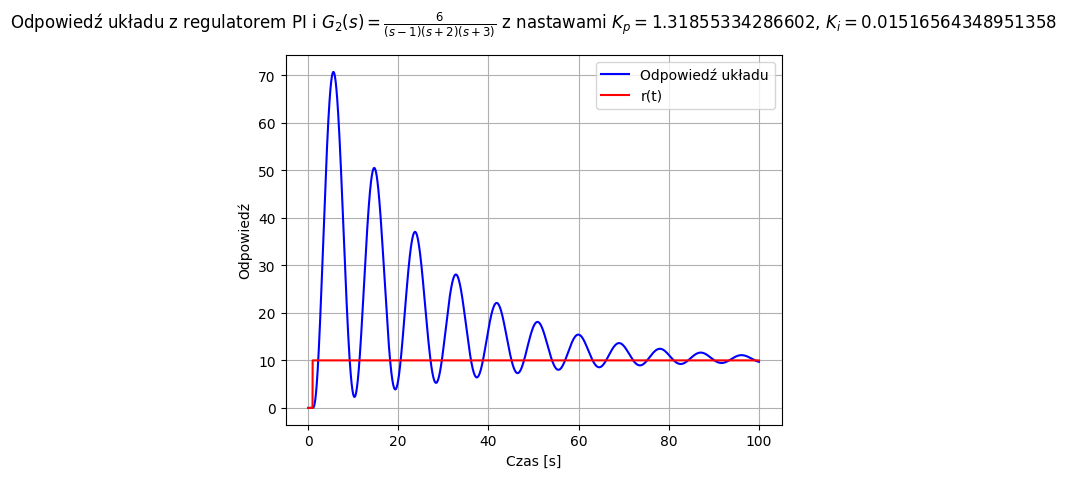

In [119]:
K_p, K_i = optimal_K_p, optimal_K_i
L_s, M_s = sp.fraction(G2_s)
num_coeffs = [float(c) for c in sp.Poly(L_s, s).all_coeffs()]
den_coeffs = [float(c) for c in sp.Poly(M_s, s).all_coeffs()]
G_tf = ctrl.TransferFunction(num_coeffs, den_coeffs)

C = ctrl.TransferFunction([K_p, K_i], [1, 0])
T = ctrl.feedback(C * G_tf, 1)

y_t = ctrl.forced_response(T, time, r)[1]

plt.plot(time, y_t, 'b', label='Odpowied≈∫ uk≈Çadu')
plt.plot(time, r, 'r', label='r(t)')

plt.title(fr'Odpowied≈∫ uk≈Çadu z regulatorem PI i $G_2(s) = {sp.latex(G2_s)}$ z nastawami $K_p = {K_p}$, $K_i = {K_i}$', pad=20)
plt.xlabel('Czas [s]')
plt.ylabel('Odpowied≈∫')
plt.legend()
plt.grid(True)
plt.show()

### Wnioski
- Biblioteki scipy, sympy oraz control w pythonie dostarczajƒÖ odpowiednich narzƒôdzi do wyznaczania optymalnych nastaw regulatora, wg okre≈õlonych kryteri√≥w
- Metody biblioteczne (scipy.optimize) wykorzystujƒÖ zaawansowane algorytmy, dziƒôki czemu osiƒÖgajƒÖ zadowalajƒÖce wyniki przy znacznie mniejszym obciƒÖ≈ºeniu obliczeniowym
- Metoda rƒôczna wymaga gƒôstego przeszukiwania przestrzeni parametr√≥w, a z≈Ço≈ºono≈õƒá obliczeniowa ro≈õnie wyk≈Çadniczo z dok≈Çadno≈õciƒÖ poszukiwa≈Ñ, ale zapewnia potencjalnie wy≈ºszƒÖ dok≈Çadno≈õƒá ni≈º metody biblioteczne
- Hybrydowe podej≈õcie, ≈ÇƒÖczƒÖce metody biblioteczne i rƒôcznƒÖ gdzie najpierw przybli≈ºamy za pomocƒÖ scipy.optimize, a nastƒôpnie przeszukujemy dok≈Çadniej zawƒô≈ºony obszar rƒôcznie mo≈ºe daƒá najlepsze rezultaty przy nieco mniejszym narzucie obliczeniowym